In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Entradas: [m², habitaciones, baños]
X = np.array([
    [60, 2, 1],
    [80, 3, 1],
    [100, 3, 2],
    [120, 4, 2],
    [150, 4, 3],
    [200, 5, 3],
    [250, 6, 4]
], dtype=float)

# Precios (miles de USD)
y = np.array([
    [90],
    [120],
    [150],
    [180],
    [230],
    [300],
    [370]
], dtype=float)


In [4]:
model = keras.Sequential([
    layers.Dense(8, input_shape=(3,), activation='relu'),  # capa oculta
        layers.Dense(4, activation='relu'),
    layers.Dense(1)  # capa de salida (precio)
])

c:\Users\Miguel\Desktop\Miguelon\GH\Inteligencia_Artificial_Activities\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
history = model.fit(X, y, epochs=1000, verbose=0)

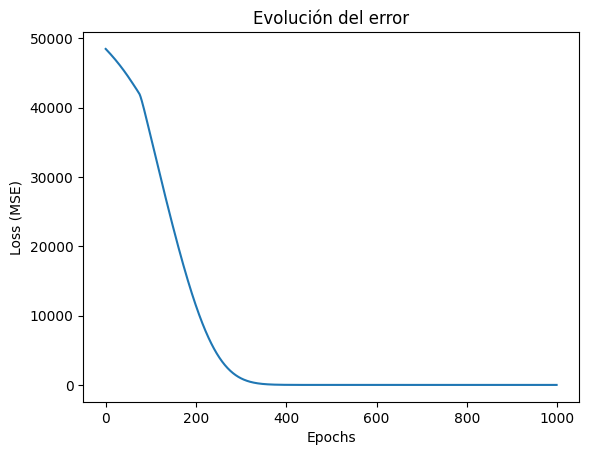

In [7]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error')
plt.show()

In [8]:
X_test = np.array([
    [90, 3, 1],
    [160, 4, 3],
    [220, 5, 4]
], dtype=float)

predictions = model.predict(X_test)

for features, price in zip(X_test, predictions):
    print(f"Casa de {features[0]} m², {features[1]} habs, {features[2]} baños → "
        f"precio estimado: {price[0]:.1f} mil USD")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Casa de 90.0 m², 3.0 habs, 1.0 baños → precio estimado: 135.6 mil USD
Casa de 160.0 m², 4.0 habs, 3.0 baños → precio estimado: 239.7 mil USD
Casa de 220.0 m², 5.0 habs, 4.0 baños → precio estimado: 328.0 mil USD


**Visualización 3D del modelo entrenado (m² vs. precio)**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generar un rango de m²
m2_range = np.linspace(50, 250, 50)

# Fijar valores medios de habitaciones y baños
habitaciones_fijas = 3
baños_fijos = 2

# Crear entradas de prueba combinadas
X_pred = np.array([[m2, habitaciones_fijas, baños_fijos] for m2 in m2_range])
y_pred = model.predict(X_pred)

# Crear figura 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Datos originales
ax.scatter(X[:,0], X[:,1], y, color='blue', label='Datos reales', s=50)

# Superficie aprendida (m² vs. precio)
ax.plot(m2_range, [habitaciones_fijas]*len(m2_range), y_pred.flatten(),
        color='red', linewidth=2, label='Modelo aprendido')

ax.set_xlabel('Tamaño (m²)')
ax.set_ylabel('Habitaciones (fijas)')
ax.set_zlabel('Precio (miles USD)')
ax.set_title('Modelo de regresión múltiple en Keras (3D)')
ax.legend()
plt.show()


NameError: name 'baños_fijas' is not defined